In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
def radius(transition_duration,full_eclipse_length,x_ray_source_radius,beta):
    t_total = full_eclipse_length
    dark_eclipse_length = full_eclipse_length - 2*transition_duration
    t_low = dark_eclipse_length
    kappa = (((t_total/t_low)**2+1)/((t_total/t_low)**2-1))
    rho_max = kappa - np.sqrt(kappa**2-1+beta**2)
    r_3_min = x_ray_source_radius/rho_max
    return r_3_min

In [80]:
transition_duration_times = np.arange(1,300,1)
# in cm
NS_x_ray_source = 1.5*10**8
BH_x_ray_source = 1.9*10**9

full_eclipse_length = 5300
beta = .99
NS_radiuses_upper = radius(transition_duration_times,full_eclipse_length,NS_x_ray_source,beta)
BH_radiuses_upper = radius(transition_duration_times,full_eclipse_length,BH_x_ray_source,beta)

beta = .5
NS_radiuses_mid = radius(transition_duration_times,full_eclipse_length,NS_x_ray_source,beta)
BH_radiuses_mid = radius(transition_duration_times,full_eclipse_length,BH_x_ray_source,beta)

beta = 0
NS_radiuses = radius(transition_duration_times,full_eclipse_length,NS_x_ray_source,beta)
BH_radiuses = radius(transition_duration_times,full_eclipse_length,BH_x_ray_source,beta)

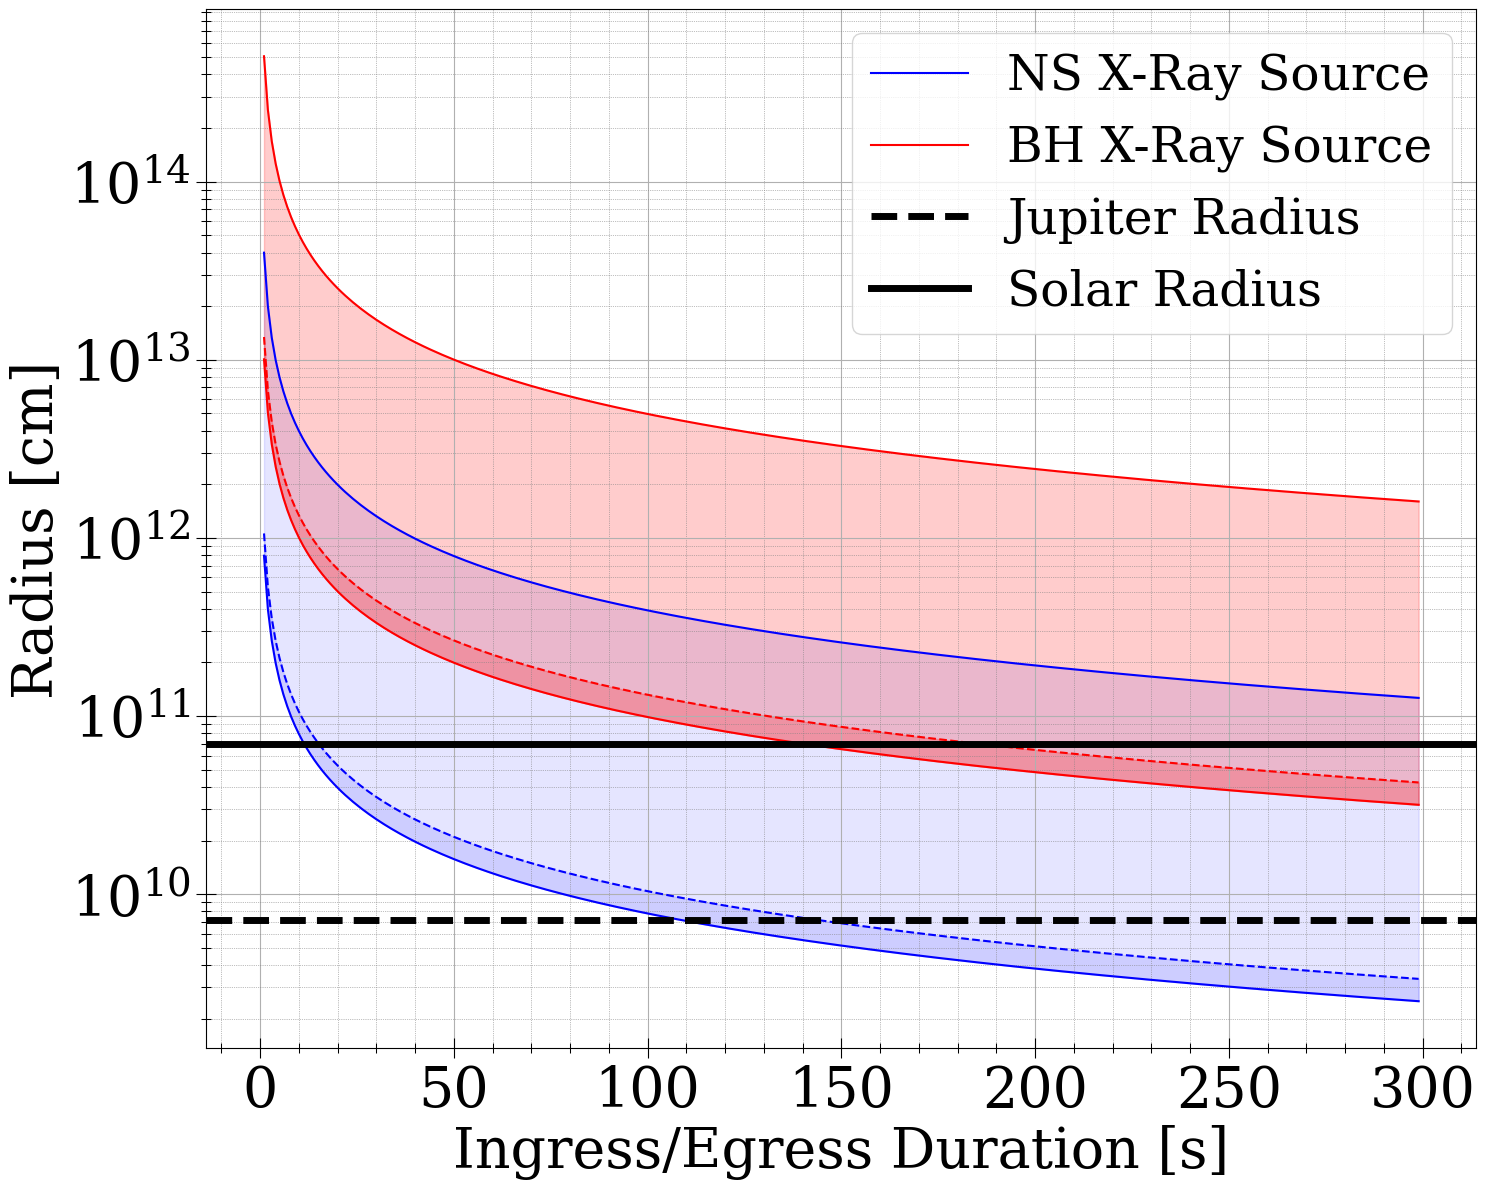

In [83]:
plt.rcParams["figure.figsize"] = (15,12)
plt.rcParams.update({
            'font.sans-serif': 'Times New Roman',
            'font.family': 'serif'
            })

textsize=40
jupiter_radius = 71492*1000*100
solar_radius = 6.957*10**10
plt.plot(transition_duration_times,NS_radiuses,color='blue',label="NS X-Ray Source")
plt.plot(transition_duration_times,BH_radiuses,color='red',label="BH X-Ray Source")

plt.plot(transition_duration_times,NS_radiuses_upper,color='blue')
plt.plot(transition_duration_times,BH_radiuses_upper,color='red')

plt.plot(transition_duration_times,NS_radiuses_mid,color='blue',linestyle='--')
plt.plot(transition_duration_times,BH_radiuses_mid,color='red',linestyle='--')



plt.yscale('log')
plt.axhline(y=jupiter_radius,color='black',linestyle='--',label='Jupiter Radius',linewidth=5)
plt.axhline(y=solar_radius,color='black',label='Solar Radius',linewidth=5)
plt.grid()
plt.tick_params(axis='both', which='both',direction='inout',length=15,labelsize=textsize)
plt.tick_params(which='minor', width=0.75, length=7)
plt.minorticks_on()
plt.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
plt.xlabel("Ingress/Egress Duration [s]",fontsize=textsize)
plt.ylabel("Radius [cm]",fontsize=textsize)

plt.fill_between(transition_duration_times, NS_radiuses, NS_radiuses_upper, color='blue', alpha=.1)
plt.fill_between(transition_duration_times, NS_radiuses, NS_radiuses_mid, color='blue', alpha=.1)

plt.fill_between(transition_duration_times, BH_radiuses, BH_radiuses_upper, color='red', alpha=.2)
plt.fill_between(transition_duration_times, BH_radiuses, BH_radiuses_mid, color='red', alpha=.2)

plt.tight_layout()
plt.legend(fontsize=35)
plt.savefig("third_body_radii")

